In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    )

Found 2152 files belonging to 5 classes.


In [3]:
class_names = dataset.class_names
class_names

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'api',
 'models']

In [4]:
len(dataset)

68

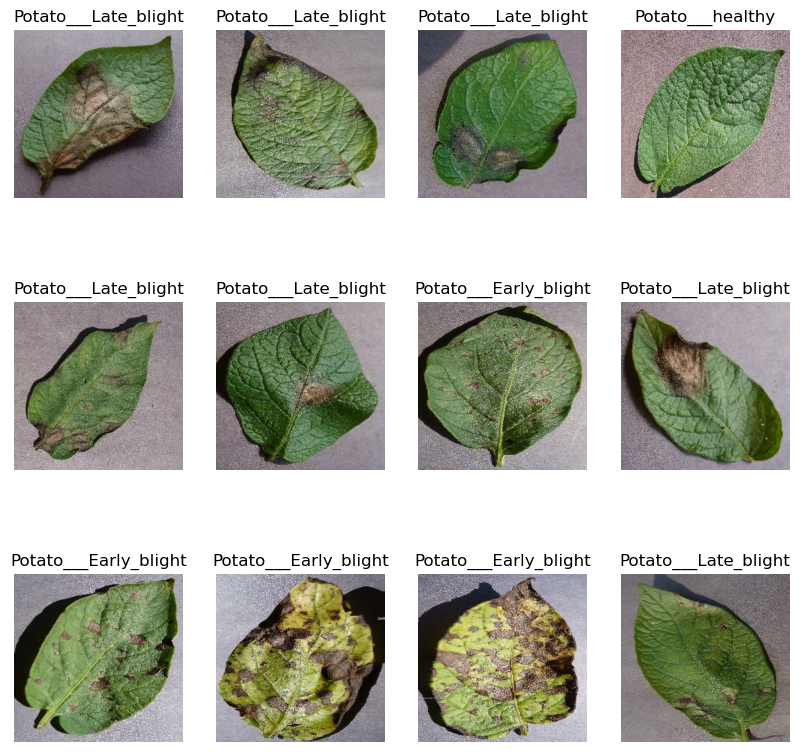

In [5]:
plt.figure(figsize=(10, 10))
for img_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(img_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [6]:
train_size=0.8
train_size=int(train_size*len(dataset))
print(train_size)

54


In [7]:
train_ds=dataset.take(54)
len(train_ds)

54

In [8]:
remaining_ds=dataset.skip(54)
len(remaining_ds)

14

In [9]:
test_size=0.1
test_size=int(test_size*len(dataset))
print(test_size)

6


In [10]:
val_ds=remaining_ds.take(6)
test_ds=remaining_ds.skip(6)

In [11]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [12]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
IMAGE_SIZE=256
resize_and_rescale=tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255)
])

In [14]:
data_augmentation=tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [15]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=35


In [16]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\Megh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [19]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.4506 - loss: 0.9753 - val_accuracy: 0.5312 - val_loss: 0.9097
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.5677 - loss: 0.8474 - val_accuracy: 0.6771 - val_loss: 0.6555
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - accuracy: 0.7102 - loss: 0.6023 - val_accuracy: 0.7969 - val_loss: 0.4801
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 53s 986ms/step - accuracy: 0.7848 - loss: 0.5074 - val_accuracy: 0.7760 - val_loss: 0.4666
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 52s 966ms/step - accuracy: 0.8305 - loss: 0.4091 - val_accuracy: 0.8802 - val_loss: 0.3412
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.8655 - loss: 0.3379 - val_accuracy: 0.8854 - val_loss: 0.3060
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9029 - loss: 0.2425 - val_accuracy: 0.9062 - val_loss: 0.2282
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9222 - loss: 0.1991 - val_accuracy: 0.9062 - val

In [20]:
scores=model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 210ms/step - accuracy: 0.9779 - loss: 0.0894


In [21]:
scores

[0.06451743096113205, 0.982758641242981]

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step
predicted label: Potato___healthy


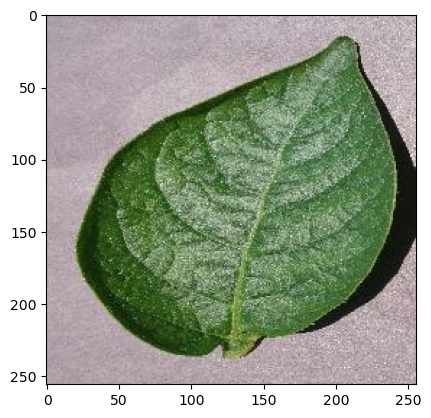

In [22]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

    

In [23]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model,predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [27]:
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import save_model

model_folder = "C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models"
model_file_path = os.path.join(model_folder, "1.h5")

model.save(model_file_path)
print(f"Model saved successfully at: {model_file_path}")



Model saved successfully at: C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models\1.h5


In [25]:
model.export('C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models/1')

INFO:tensorflow:Assets written to: C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models/1\assets


INFO:tensorflow:Assets written to: C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models/1\assets


Saved artifact at 'C:/Users/Megh/Desktop/2nd yr/extra-curricular/Hackathons/AIML/DL/Potato/models/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1819822263952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822264528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822265104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822265680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822265488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822264720: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822267024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822267984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822267792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1819822268560: TensorSpec(shape=(), dt